## This file will be showing the data analysis on Car Accident Capstone

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import datetime
import calendar
import matplotlib.pyplot  as plt

pd.set_option('display.max_columns', None)

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


#### Reading the dataset

In [5]:
data = pd.read_csv("data_cleaned.csv")

#### Taking a glimpse of our dataset

In [6]:
data.head(2)


,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,year,month,day
0,Intersection,2,Pedestrian,11/20/2019 10:25:00 AM,At Intersection (intersection related),0,Clear,Dry,Daylight,Y,0,N,2019,Nov,20
1,Intersection,2,Angles,11/18/2019 5:01:00 PM,At Intersection (intersection related),0,Raining,Wet,Dark - Street Lights On,Y,0,N,2019,Nov,18


#### Checking out shape of the our dataset

In [7]:
data.shape

(199630, 15)

## Checking our Target Column

In [8]:
data['SEVERITYCODE'].value_counts()

1    137485
2     58698
3      3098
4       349
Name: SEVERITYCODE, dtype: int64

### Severity Code corresponding meaning
##### 1 - Property Damage
##### 2 - Injury
##### 3 - Serious Injury
##### 4 - Fatality

#### As we can see, this data is highly unbalanced and have more occurences around the Severtiy code '1'.

#### We have to balance it using resampling techniques else the model will give highly biased result favoring severitycode '1'.

#### But before, we need to select features for our models.

In [9]:
data.isnull().sum()

ADDRTYPE         0
SEVERITYCODE     0
COLLISIONTYPE    0
INCDTTM          0
JUNCTIONTYPE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
PEDROWNOTGRNT    0
SPEEDING         0
HITPARKEDCAR     0
year             0
month            0
day              0
dtype: int64

In [10]:
data['SEVERITYCODE'].dtype

dtype('int64')

# Plotting bar graphs of severity code against every feature

## Bar graph for intensity of accidents of each category

Text(0, 0.5, 'Count')

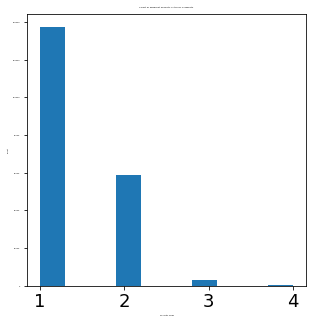

In [75]:
data['SEVERITYCODE'].plot(kind='hist', figsize=(5,5))
plt.title("Count of different severity of traffic accidents")

new_ticks = np.linspace(1, 4, 4)
plt.xticks(new_ticks)

plt.xlabel("Severity Code")
plt.ylabel("Count")

## Plotting against Address type

Text(0.5, 0, 'Address type')

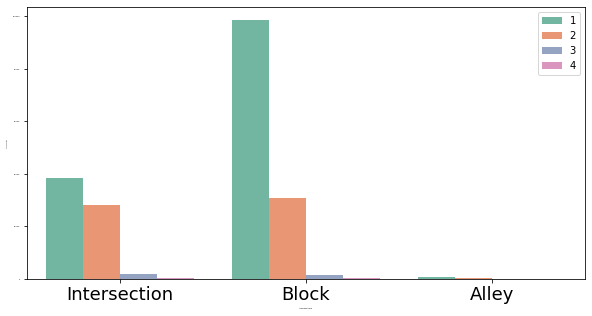

In [76]:
# Plotting severity code against Address type

plt.figure(figsize=(10,5))
sns.countplot(x=data['ADDRTYPE'], hue='SEVERITYCODE', data=data, palette='Set2')
plt.legend(loc='upper right', prop={'size':10})
plt.ylabel('Accidents')
plt.xlabel('Address type')

# Graph shows Accidents happened a lot in Blocks

Text(0.5, 0, 'Collision type')

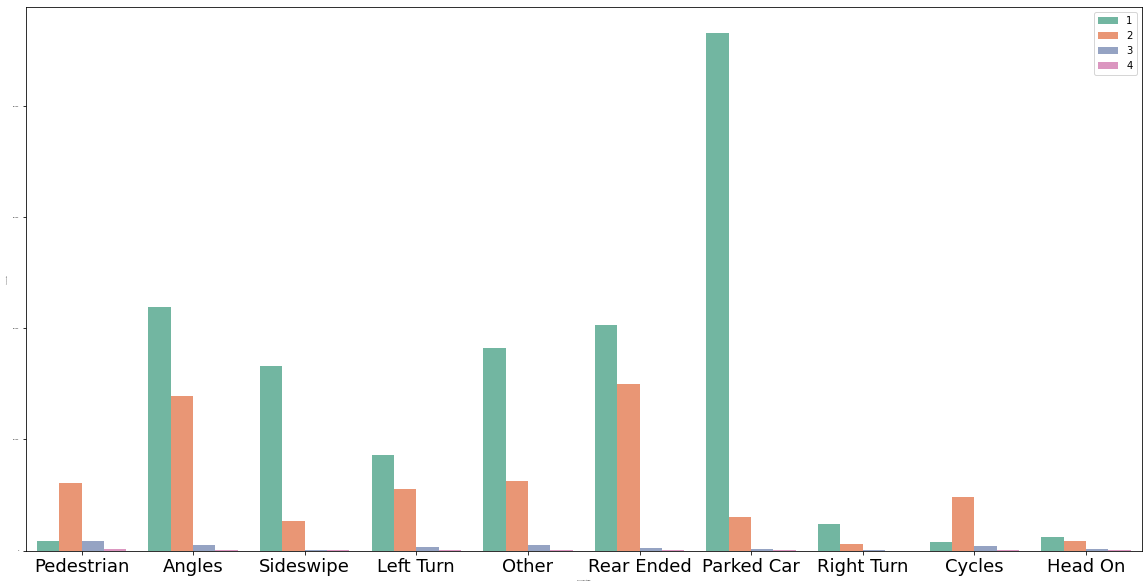

In [77]:
# Plotting severity code against Address type

plt.figure(figsize=(20,10))
sns.countplot(x=data['COLLISIONTYPE'], hue='SEVERITYCODE', data=data, palette='Set2')
plt.legend(loc='upper right', prop={'size':10})
plt.ylabel('Accidents')
plt.xlabel('Collision type')

# Graph shows Accidents happened a lot in Blocks

> This shows most of the accidents happened with parked cars

## Plotting against Junction Type

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

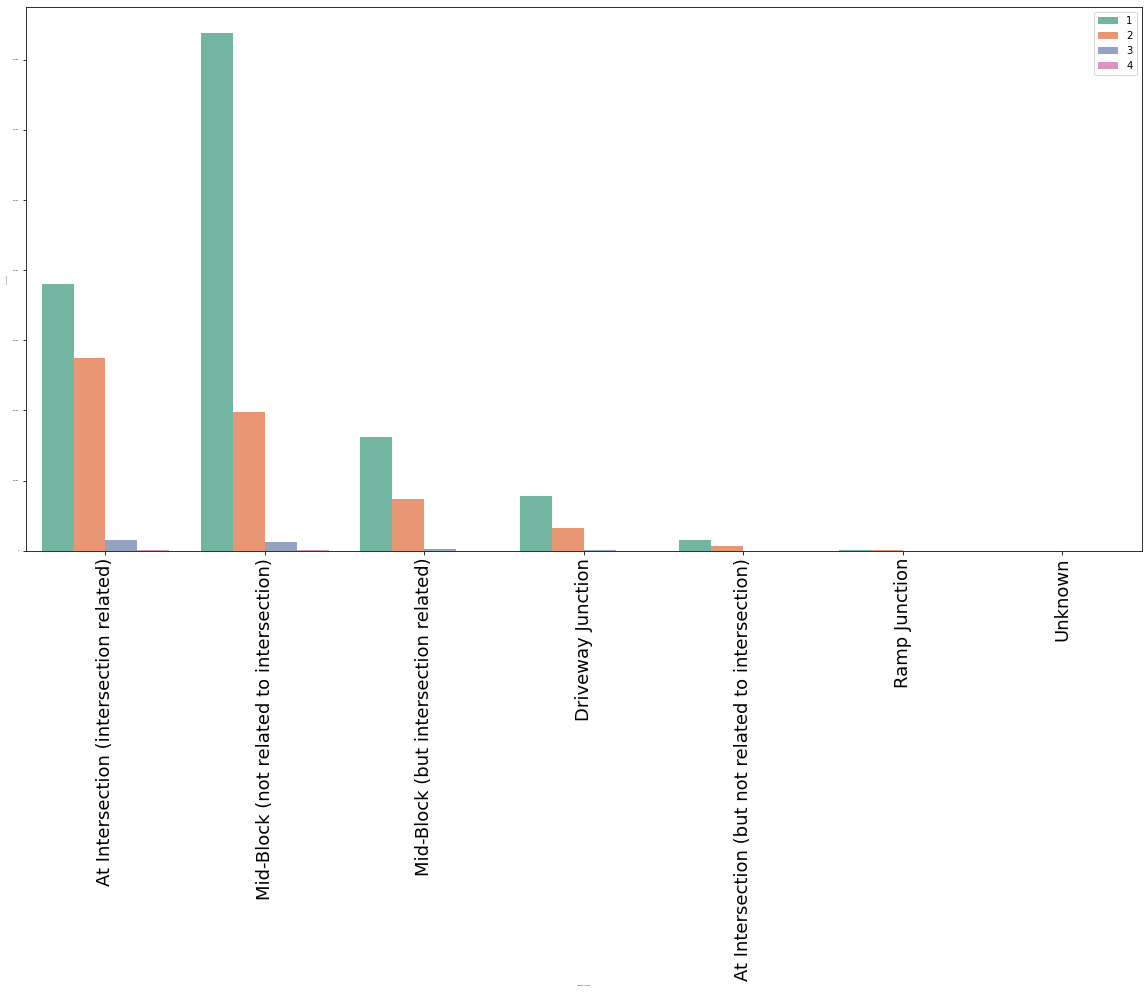

In [78]:
# Plotting severity code against Address type

plt.figure(figsize=(20,10))
sns.countplot(x=data['JUNCTIONTYPE'], hue='SEVERITYCODE', data=data, palette='Set2')
plt.legend(loc='upper right', prop={'size':10})
plt.ylabel('Accidents')
plt.xlabel('Junction type')
plt.xticks(rotation=90)

# Graph shows Accidents happened a lot in Blocks

> Most Accidents happened in **Mid-Block (not related to intersection)**

## Plotting against Under influence of alcohol or not

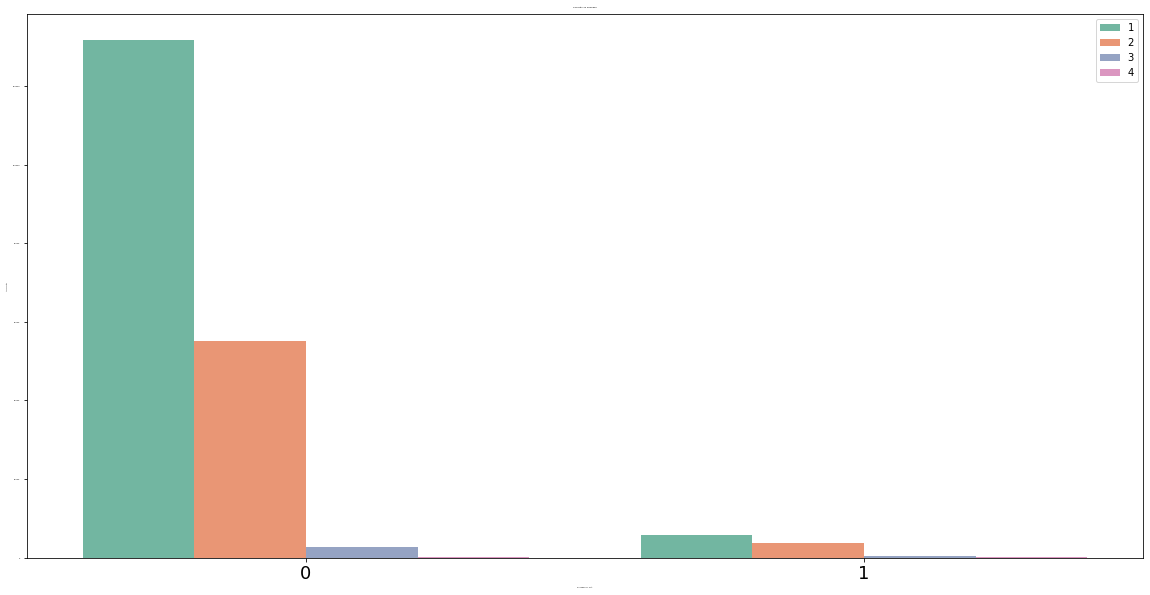

In [79]:
# Plotting severity code against Address type

plt.figure(figsize=(20,10))
#plt.rc('font', size=20)  
sns.countplot(x=data['UNDERINFL'], hue='SEVERITYCODE', data=data, palette='Set2')
plt.legend(loc='upper right', prop={'size':10})
plt.title("Severity vs Drunken")
plt.ylabel('Accidents')
plt.xlabel('Drunken or not')
plt.show() 



> **Most of the drivers were not drunken while driving**

## Plotting against Weather

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

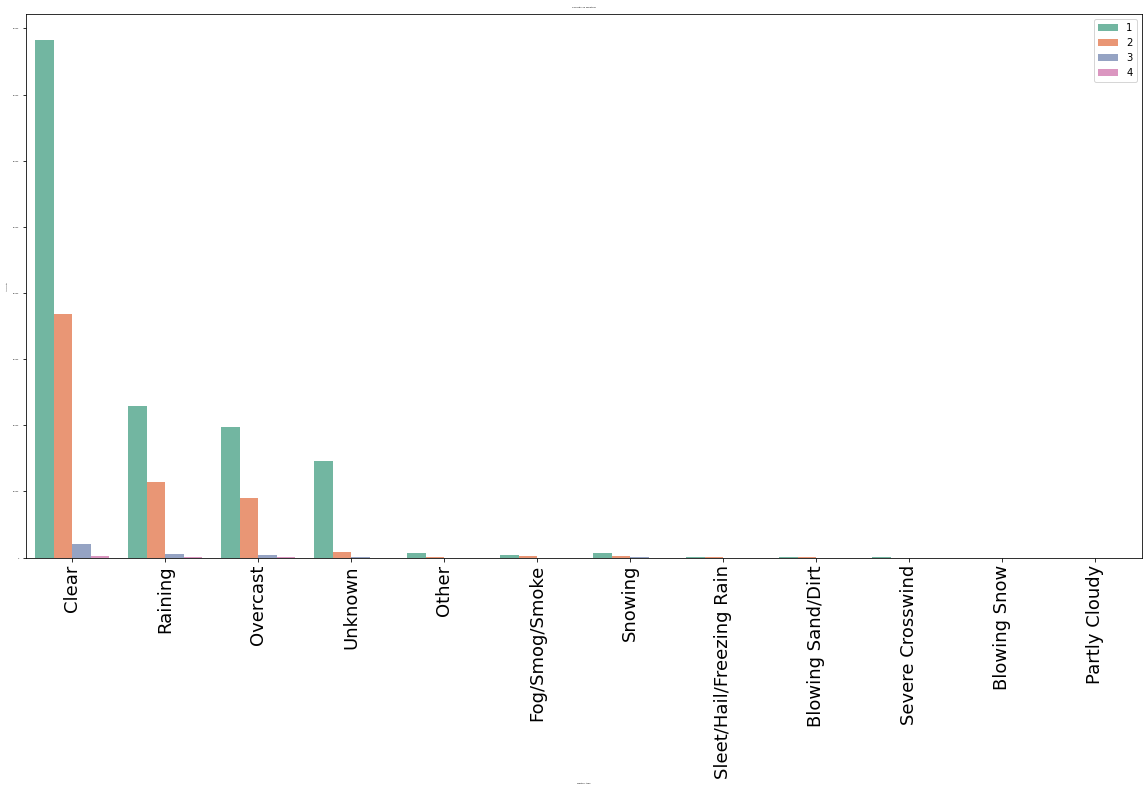

In [80]:
# Plotting severity code against Address type

plt.figure(figsize=(20,10))
#plt.rc('font', size=20)  
sns.countplot(x=data['WEATHER'], hue='SEVERITYCODE', data=data, palette='Set2')
plt.legend(loc='upper right', prop={'size':10})
plt.title("Severity vs Weather")
plt.ylabel('Accidents')
plt.xlabel('Weather type')
plt.xticks(rotation=90) 



> Most of the accidents happened during **Clear** Day

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

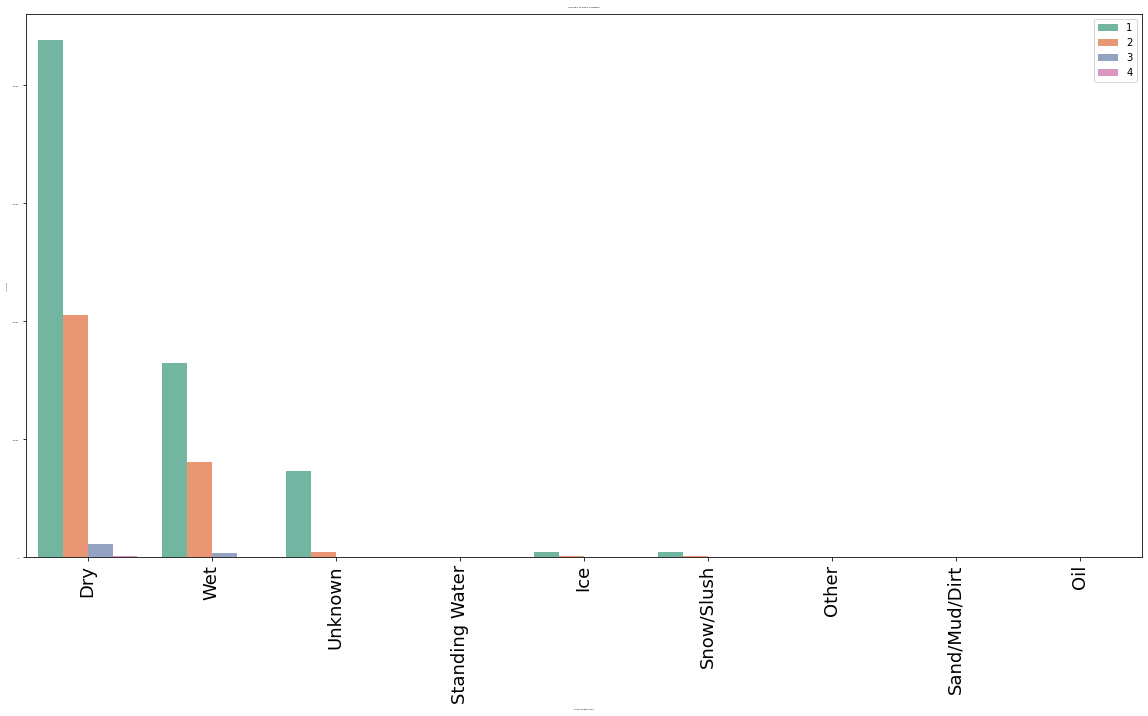

In [81]:
# Plotting severity code against Address type

plt.figure(figsize=(20,10))
#plt.rc('font', size=20)  
sns.countplot(x=data['ROADCOND'], hue='SEVERITYCODE', data=data, palette='Set2')
plt.legend(loc='upper right', prop={'size':10})
plt.title("Severity vs Rpad Condition")
plt.ylabel('Accidents')
plt.xlabel('Road Condtion type')
plt.xticks(rotation=90) 



> Most Accidents happened on **Dry** road

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

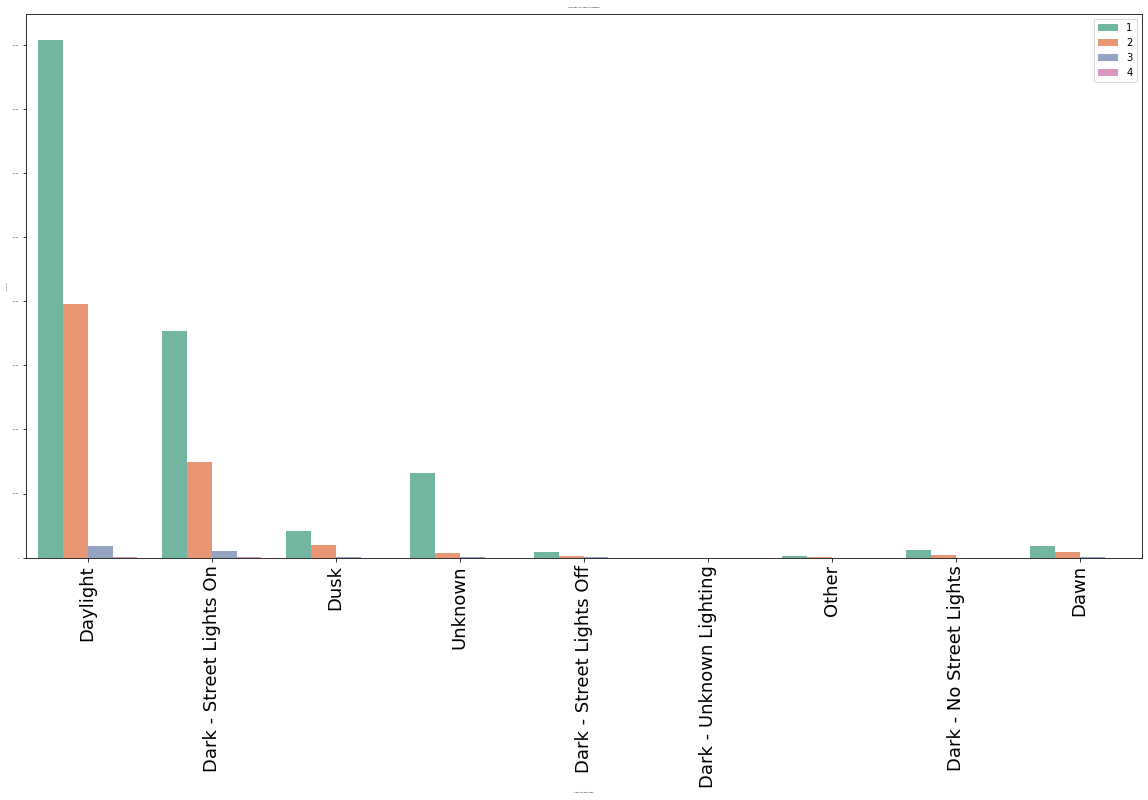

In [82]:
# Plotting severity code against Address type

plt.figure(figsize=(20,10))
#plt.rc('font', size=20)  
sns.countplot(x=data['LIGHTCOND'], hue='SEVERITYCODE', data=data, palette='Set2')
plt.legend(loc='upper right', prop={'size':10})
plt.title("Severity vs Light Condition")
plt.ylabel('Accidents')
plt.xlabel('Light Condtion type')
plt.xticks(rotation=90) 



> Most accidents happened during **Daylight**

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

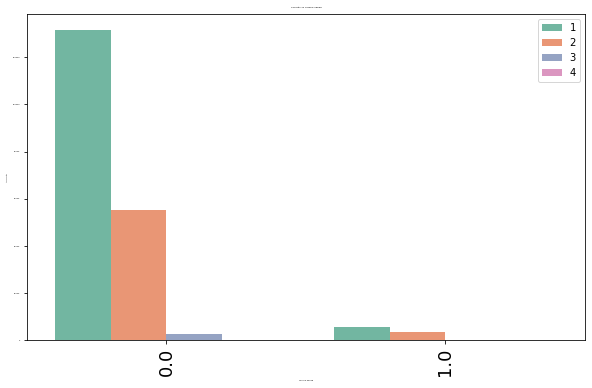

In [85]:
# Plotting severity code against Address type

plt.figure(figsize=(10,6))
#plt.rc('font', size=10)  
sns.countplot(x=data['SPEEDING'], hue='SEVERITYCODE', data=data, palette='Set2')
plt.legend(loc='upper right', prop={'size':10})
plt.title("Severity vs Vehicle Speed")
plt.ylabel('Accidents')
plt.xlabel('Vehicle Speed')
plt.xticks(rotation=90) 



> Most of the drivers were not so speedy when accidents happened.

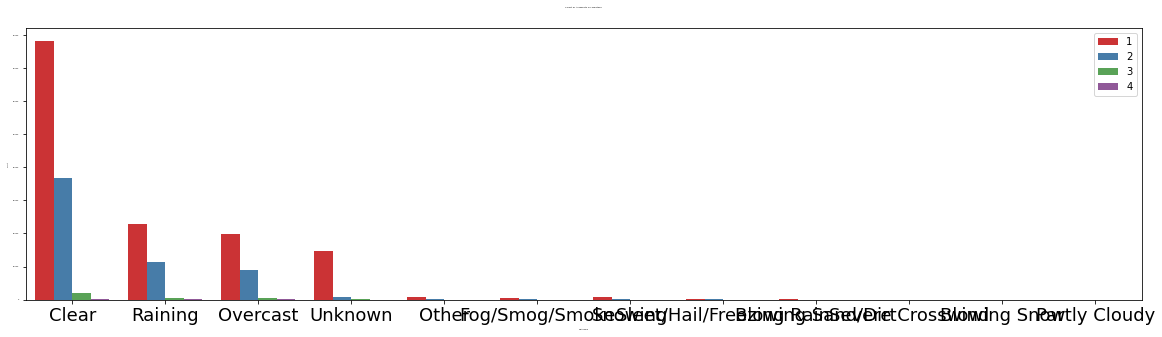

In [86]:
# Plotting Accidents based on Weather

plt.figure(figsize=(20,5))
sns.countplot(x='WEATHER', hue='SEVERITYCODE', data=data, palette="Set1")
plt.legend(loc='upper right', prop={'size': 10})
plt.title('Count of Accidents by Weather', y=1.05)
plt.show()

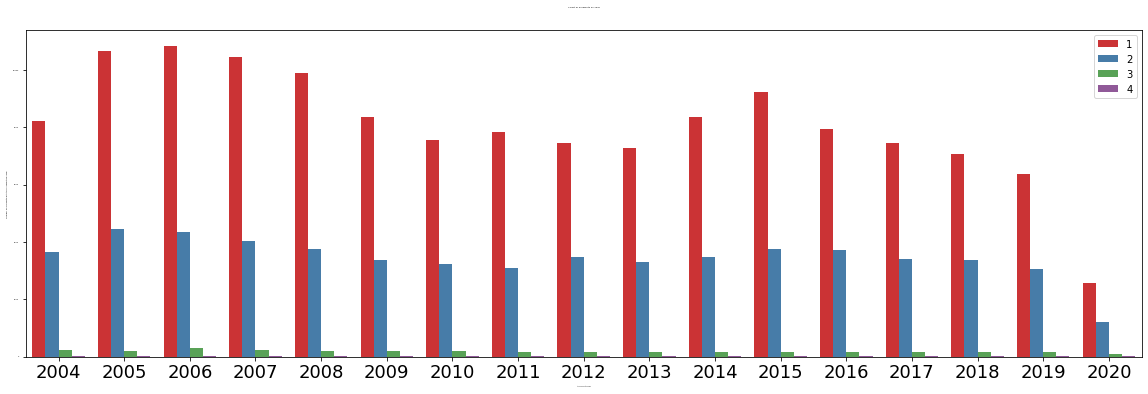

In [87]:
plt.figure(figsize=(20,6))
sns.countplot(x='year', hue='SEVERITYCODE', data=data, palette='Set1')
plt.legend(loc='best', prop={'size' : 10})
plt.title("Count of accidents by year",y=1.05)
plt.ylabel("Number of accidents with their respective code")
plt.xlabel("Accident Year")
plt.show()


Text(0, 0.5, 'Accidents...')

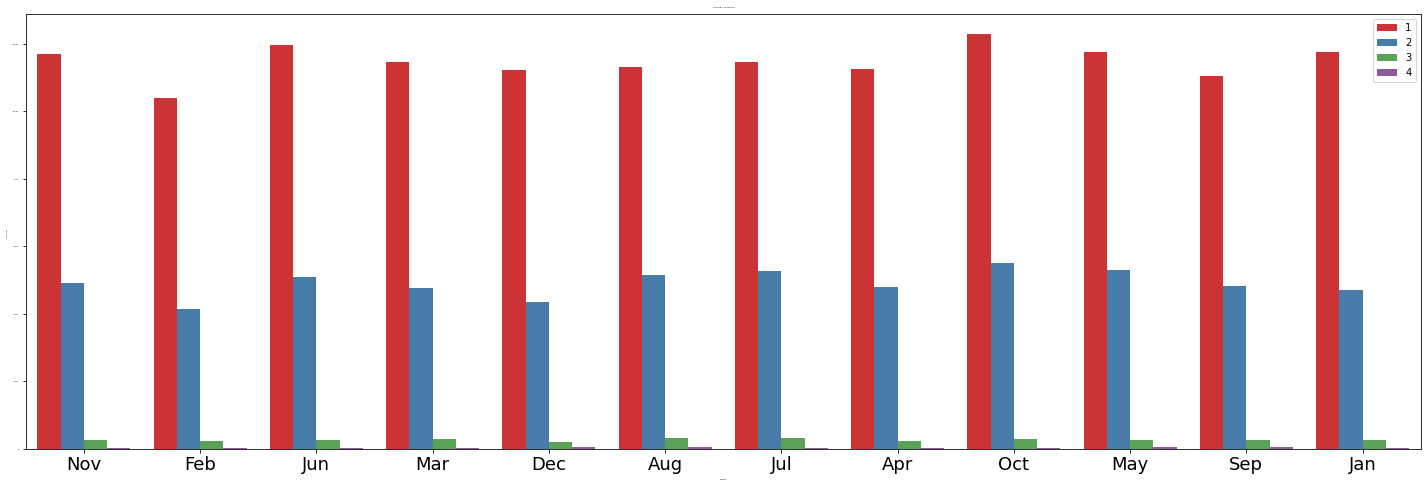

In [89]:
plt.figure(figsize=(25,8))
sns.countplot(x = data['month'], hue='SEVERITYCODE', data=data, palette='Set1')
plt.legend(loc='upper right', prop={'size' : 10})
plt.title("Severity vs Month")
plt.xlabel("Months")
plt.ylabel("Accidents...")